In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_hilbert_space(size):
    dim = np.arange(2 ** size)
    space = (((dim[:, None] & (1 << np.arange(size)))) > 0)[:, ::-1]
    space = space.astype(int)
    return space

def get_samples_from_psi_indices(indices, N):
    return (((indices[:, None] & (1 << np.arange(N)))) > 0)[:, ::-1].astype(int)

def gen_inds_from_samples(samples):
    inds = np.zeros(len(samples))
    for i in range(len(samples)):
        inds[i] = int("".join(str(i) for i in samples[i]), base=2)
    return inds.astype(int)

def gen_samples(num_samples, N, psi):
    probs = psi * psi
    probs = probs / sum(probs) # numpy needs the prob vector to sum to EXACTLY 1...
    indices = np.random.choice(len(probs), size=num_samples, p=probs)
    return indices, get_samples_from_psi_indices(indices, N)

def gen_data(psi_path, num_samples):
    N = 9
    size = 2 ** N
    vis = generate_hilbert_space(N)

    psi = np.loadtxt(psi_path) # real part
    _, samples = gen_samples(num_samples, N, psi)

    np.savetxt("2Drnn_psi_exact_samples.dat", samples, fmt='%.0f')
    
gen_data("2Drnn_psi.dat", 100000)

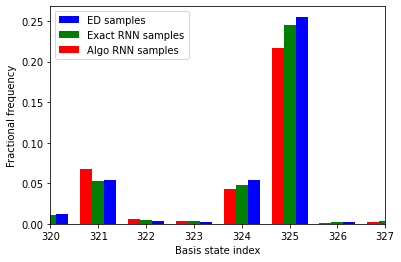

In [3]:
ED_psi = np.loadtxt("true_psi_L=3_Rb=1.2_delta=1.12.dat")[:, 0]

num_samples = 10000
N=9
exact_RNN_samples = np.loadtxt("2Drnn_psi_exact_samples.dat", dtype=int)
algo_RNN_samples = np.loadtxt("2Drnn_samples.dat", dtype=int)

probs = ED_psi * ED_psi
probs = probs[probs > 1e-13]

ED_inds, ED_samples = gen_samples(num_samples, N, ED_psi)
exact_RNN_inds = gen_inds_from_samples(exact_RNN_samples)
algo_RNN_inds = gen_inds_from_samples(algo_RNN_samples)

ED_uniques, ED_counts = np.unique(ED_inds, return_counts=True)
exact_RNN_uniques, exact_RNN_counts = np.unique(exact_RNN_inds, return_counts=True)
algo_RNN_uniques, algo_RNN_counts = np.unique(algo_RNN_inds, return_counts=True)


ED_counts = ED_counts / len(ED_inds)
exact_RNN_counts = exact_RNN_counts / len(exact_RNN_inds)
algo_RNN_counts = algo_RNN_counts / len(algo_RNN_inds)

plt.figure()
plt.bar(ED_uniques+0.25, ED_counts, color='blue',
        label="ED samples", align='center', width=0.25)
#plt.bar(ED_uniques+0.2, probs, color='black',
#        label="True prob (ED)", align='center', width=0.2)
plt.bar(exact_RNN_uniques, exact_RNN_counts, color='green',
        label="Exact RNN samples", align='center', width=0.25)
plt.bar(algo_RNN_uniques-0.25, algo_RNN_counts, color='red',
        label="Algo RNN samples", align='center', width=0.25)


plt.xlabel("Basis state index")
plt.ylabel("Fractional frequency")
plt.legend()
#plt.ylim(0, 0.2)
plt.xlim(320, 327)
plt.show()